[handson-ml2](https://github.com/ageron/handson-ml2)

In [1]:
%matplotlib inline

(2000, 2) (2000,)
(400, 2) (400,)
(400, 2) (400,)
(400, 2) (400,)
(400, 2) (400,)
(400, 2) (400,)


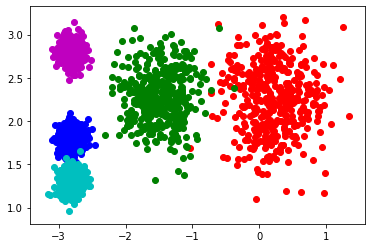

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

x, y = make_blobs(n_samples=2000, 
                  centers=blob_centers,
                  cluster_std=blob_std, 
                  random_state=7)

print(x.shape, y.shape)
for i in range(5):
    print(x[y==i].shape, y[y==i].shape)

color = 'rgbmc'
for i in range(5):
    plt.scatter(x[y==i][:,0], x[y==i][:,1], c=color[i])
plt.show()

[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]
[4 0 1 0 0]


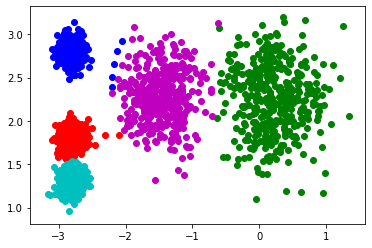

In [4]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
print(kmeans.cluster_centers_)
print(kmeans.labels_[:5])

color = 'rgbmc'
for i in range(5):
    plt.scatter(x[kmeans.labels_==i][:,0], x[kmeans.labels_==i][:,1], c=color[i])
plt.show()

In [12]:
x_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(x_new)) # hard decision
print(kmeans.transform(x_new)) # distance between points and centroids
print(np.linalg.norm(np.tile(x_new, (1, k)).reshape(-1, k, 2) - 
                     kmeans.cluster_centers_, axis=2)) # check kmeans.transform(x_new)

[1 1 2 2]
[[2.81093633 0.32995317 2.9042344  1.49439034 2.88633901]
 [5.80730058 2.80290755 5.84739223 4.4759332  5.84236351]
 [1.21475352 3.29399768 0.29040966 1.69136631 1.71086031]
 [0.72581411 3.21806371 0.36159148 1.54808703 1.21567622]]
[[2.81093633 0.32995317 2.9042344  1.49439034 2.88633901]
 [5.80730058 2.80290755 5.84739223 4.4759332  5.84236351]
 [1.21475352 3.29399768 0.29040966 1.69136631 1.71086031]
 [0.72581411 3.21806371 0.36159148 1.54808703 1.21567622]]


In [15]:
print(kmeans.inertia_) # sum of the squared distances between each training instance and its closest centroid
x_dist = kmeans.transform(x) 
np.sum(x_dist[np.arange(len(x_dist)), kmeans.labels_]**2) # check

261.79677785694696


261.79677785694673

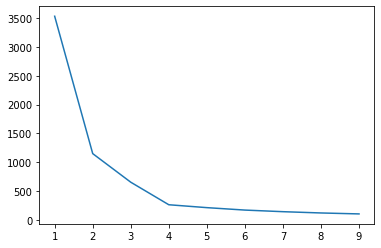

In [13]:
kmeans_list = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in range(1, 10)]
inertia_list = [model.inertia_ for model in kmeans_list]

plt.plot(range(1, 10), inertia_list)
plt.show()

<class 'numpy.ndarray'> [1 1 2 1 1]
[[-1.46679593  2.28585348]
 [-2.80214068  1.55162671]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]]
[1 1 2 1 1]


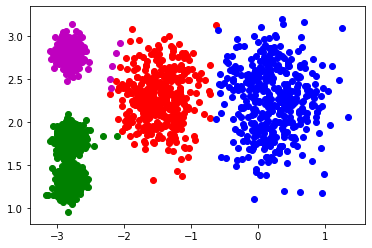

In [5]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)
print(type(y_pred), y_pred[:5])
print(kmeans.cluster_centers_)
print(kmeans.labels_[:5])

color = 'rgbmc'
for i in range(k):
    plt.scatter(x[y_pred==i][:,0], x[y_pred==i][:,1], c=color[i])
plt.show()